## EMAIL SPAM DETECTION USING MACHINE LEARNING

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/Users/abhishek/Downloads/spam.csv",encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"],axis=1,inplace=True)

In [7]:
data.rename({"v1":"target","v2":"mail"},axis=1,inplace=True)

In [8]:
data.duplicated().sum()

403

In [9]:
data = data.drop_duplicates(keep="first")

In [10]:
data

,target,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


([<matplotlib.patches.Wedge at 0x14ebf9c90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Not Spam'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.366998'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633005')])

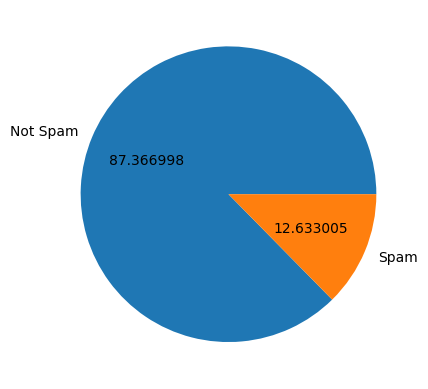

In [11]:
import matplotlib.pyplot as plt
plt.pie(data["target"].value_counts(),labels=["Not Spam","Spam"],autopct="%02f")

In [12]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/abhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
data["word_count"] = data["mail"].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
data

,target,mail,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",24
1,ham,Ok lar... Joking wif u oni...,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,ham,U dun say so early hor... U c already then say...,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",15
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,35
5568,ham,Will Ì_ b going to esplanade fr home?,9
5569,ham,"Pity, * was in mood for that. So...any other s...",15
5570,ham,The guy did some bitching but I acted like i'd...,27


In [15]:
data["char_count"] = data["mail"].apply(len)

In [16]:
data

,target,mail,word_count,char_count
0,ham,"Go until jurong point, crazy.. Available only ...",24,111
1,ham,Ok lar... Joking wif u oni...,8,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,ham,U dun say so early hor... U c already then say...,13,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,35,161
5568,ham,Will Ì_ b going to esplanade fr home?,9,37
5569,ham,"Pity, * was in mood for that. So...any other s...",15,57
5570,ham,The guy did some bitching but I acted like i'd...,27,125


In [17]:
data["sentence"] = data["mail"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
data

,target,mail,word_count,char_count,sentence
0,ham,"Go until jurong point, crazy.. Available only ...",24,111,2
1,ham,Ok lar... Joking wif u oni...,8,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,ham,U dun say so early hor... U c already then say...,13,49,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,61,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,35,161,4
5568,ham,Will Ì_ b going to esplanade fr home?,9,37,1
5569,ham,"Pity, * was in mood for that. So...any other s...",15,57,2
5570,ham,The guy did some bitching but I acted like i'd...,27,125,1


In [19]:
data.describe()

,word_count,char_count,sentence
count,5169.000000,5169.000000,5169.000000
mean,18.455794,78.977945,1.965564
std,13.324758,58.236293,1.448541
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,38.000000


In [20]:
data[data["target"]== "spam"][['word_count','char_count','sentence']].describe()

,word_count,char_count,sentence
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


In [21]:
data[data["target"]=="ham"][["word_count","char_count","sentence"]].describe()

,word_count,char_count,sentence
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.459256,1.820195
std,13.493970,56.358207,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


In [22]:
import seaborn as sns

<AxesSubplot: xlabel='word_count', ylabel='Count'>

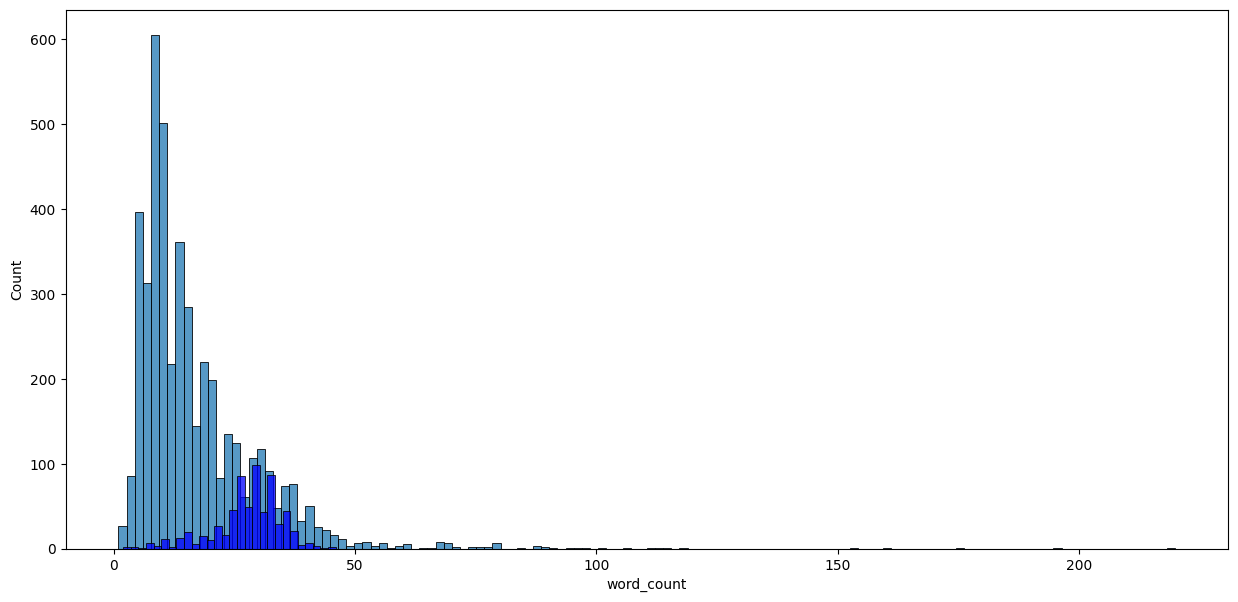

In [23]:
plt.figure(figsize=(15,7))
sns.histplot(data[data["target"]=="ham"]["word_count"])
sns.histplot(data[data["target"]== "spam"]["word_count"],color='blue')

<AxesSubplot: xlabel='sentence', ylabel='Count'>

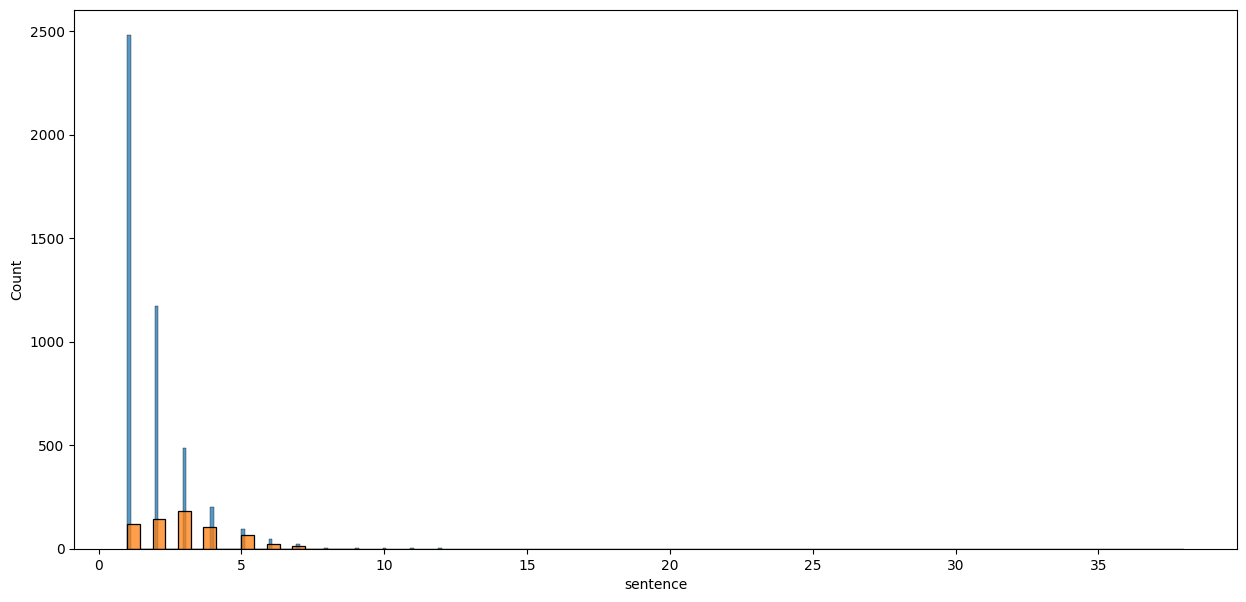

In [24]:
plt.figure(figsize=(15,7))
sns.histplot(data[data["target"]=="ham"]["sentence"])
sns.histplot(data[data["target"]=="spam"]["sentence"])

<AxesSubplot: xlabel='char_count', ylabel='Count'>

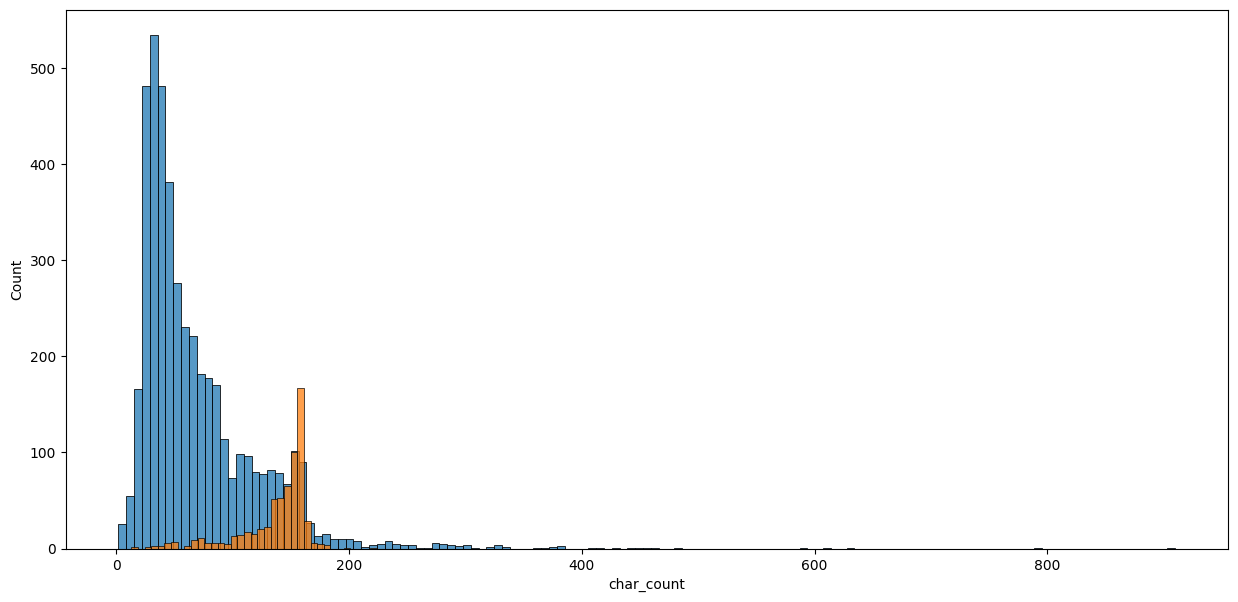

In [25]:
plt.figure(figsize=(15,7))
sns.histplot(data[data["target"]=="ham"]["char_count"])
sns.histplot(data[data["target"]=="spam"]["char_count"])

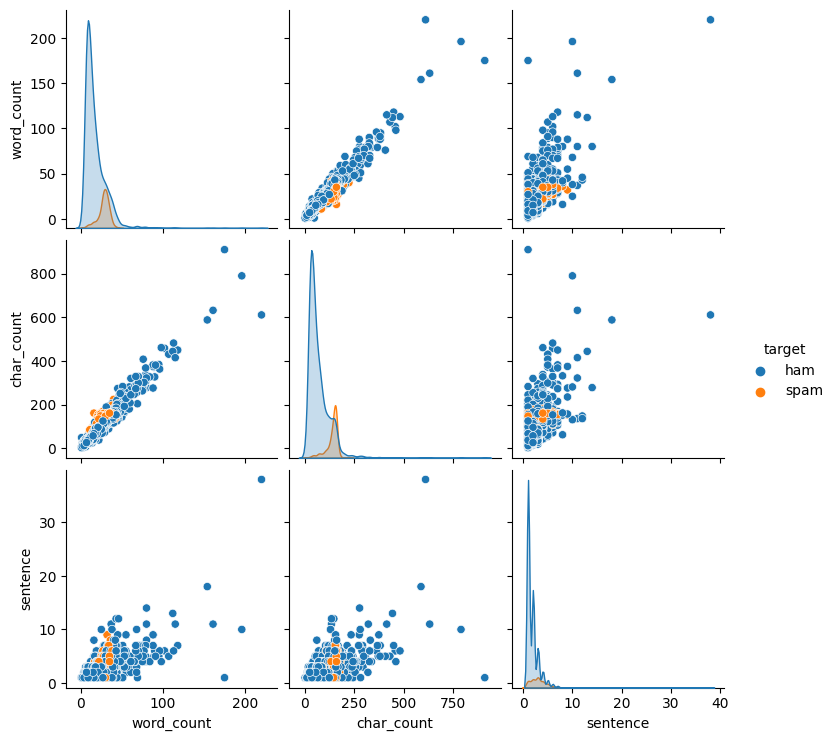

In [26]:
sns.pairplot(data,hue='target')

/var/folders/jt/8nb77p9x7mq25hh93x5bdyxh0000gn/T/ipykernel_74533/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

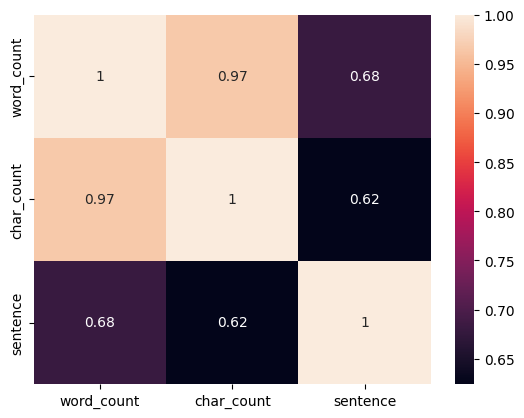

In [27]:
sns.heatmap(data.corr(),annot=True)

In [28]:
x = data.drop(["target","mail"],axis=1)
x = np.array(x)
y = data["target"]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.01,random_state=1)
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)



DecisionTreeClassifier()

In [33]:
prediction = model.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
accuracy * 100

94.23076923076923